# Cloud-Deployed Text Classification using Manual SVM

## Objective
The goal of this project is to build a binary text classification system using a
manually implemented Support Vector Machine (SVM) with different loss functions
(Hinge Loss, Squared Hinge Loss, and Logistic Loss).

The performance of these loss functions will be compared and the best-performing
model will later be deployed on a cloud platform as an API.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("IMDB Dataset.csv")

df.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


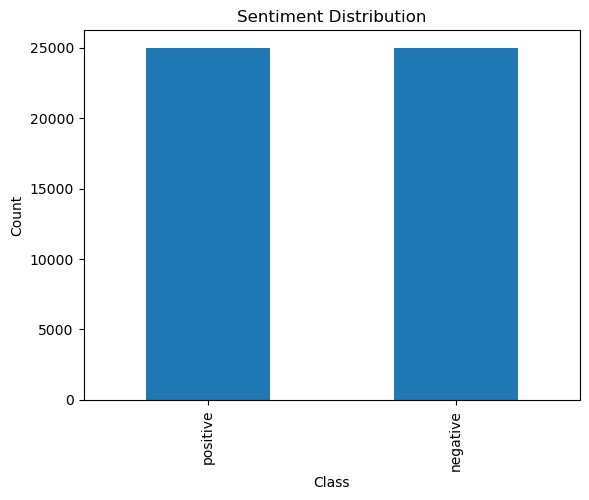

In [9]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [12]:
df['label'] = df['sentiment'].map({
    'negative': -1,
    'positive': 1
})

df[['sentiment', 'label']].head()


,sentiment,label
0,positive,1
1,positive,1
2,positive,1
3,negative,-1
4,positive,1


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=3000,
    stop_words='english'
)

X = vectorizer.fit_transform(df['review'])
y = df['label'].values

print("Feature shape:", X.shape)


Feature shape: (50000, 3000)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 40000
Testing samples: 10000


# MANUAL SVM WITH HINGE LOSS (CODE)

In [17]:
# Number of features
n_features = X_train.shape[1]

# Initialize weights and bias
w = np.zeros(n_features)
b = 0

# Hyperparameters
learning_rate = 0.001
epochs = 10
lambda_param = 0.01  # regularization


# STEP 2 — TRAINING LOOP (HINGE LOSS)

In [18]:
losses = []

for epoch in range(epochs):
    total_loss = 0
    
    for i in range(X_train.shape[0]):
        x_i = X_train[i].toarray().flatten()
        y_i = y_train[i]
        
        # Compute score
        score = np.dot(w, x_i) + b
        
        # Compute hinge loss
        loss = max(0, 1 - y_i * score)
        total_loss += loss
        
        # Gradient update
        if y_i * score >= 1:
            dw = lambda_param * w
            db = 0
        else:
            dw = lambda_param * w - y_i * x_i
            db = -y_i
        
        # Update weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db
    
    avg_loss = total_loss / X_train.shape[0]
    losses.append(avg_loss)
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")


Epoch 1/10, Loss: 0.9678
Epoch 2/10, Loss: 0.9166
Epoch 3/10, Loss: 0.8825
Epoch 4/10, Loss: 0.8607
Epoch 5/10, Loss: 0.8466
Epoch 6/10, Loss: 0.8370
Epoch 7/10, Loss: 0.8305
Epoch 8/10, Loss: 0.8260
Epoch 9/10, Loss: 0.8230
Epoch 10/10, Loss: 0.8208


# STEP 3 — VISUALIZE LOSS CURVE


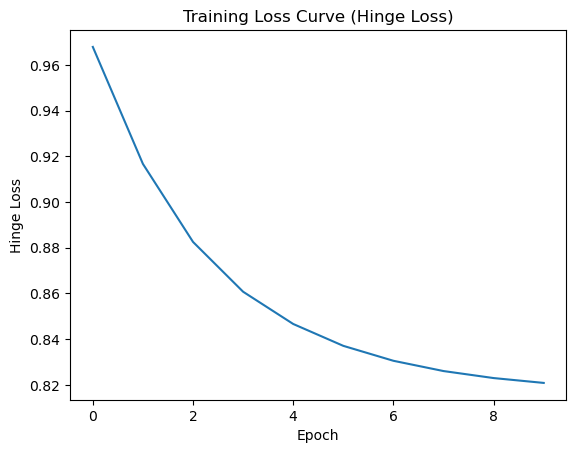

In [19]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Hinge Loss")
plt.title("Training Loss Curve (Hinge Loss)")
plt.show()


# PART 4 — TEST THE MODEL
# PREDICTION FUNCTION

In [20]:
def predict(X, w, b):
    scores = X.dot(w) + b
    return np.sign(scores)


# EVALUATION

In [21]:
y_pred = predict(X_test, w, b)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy (Hinge Loss SVM):", accuracy)


Test Accuracy (Hinge Loss SVM): 0.7962


# SQUARED HINGE LOSS
We will NOT overwrite hinge model.
We train a new model for squared hinge

## STEP 1 — INITIALIZE PARAMETERS

In [23]:
# Initialize weights and bias for Squared Hinge
w_sq = np.zeros(n_features)
b_sq = 0

learning_rate = 0.001
epochs = 10
lambda_param = 0.01


## STEP 2 — TRAINING LOOP (SQUARED HINGE)

In [24]:
sq_losses = []

for epoch in range(epochs):
    total_loss = 0
    
    for i in range(X_train.shape[0]):
        x_i = X_train[i].toarray().flatten()
        y_i = y_train[i]
        
        score = np.dot(w_sq, x_i) + b_sq
        margin = 1 - y_i * score
        
        if margin > 0:
            loss = margin ** 2
            dw = lambda_param * w_sq - 2 * y_i * margin * x_i
            db = -2 * y_i * margin
        else:
            loss = 0
            dw = lambda_param * w_sq
            db = 0
        
        w_sq = w_sq - learning_rate * dw
        b_sq = b_sq - learning_rate * db
        
        total_loss += loss
    
    avg_loss = total_loss / X_train.shape[0]
    sq_losses.append(avg_loss)
    
    print(f"Epoch {epoch+1}/{epochs}, Squared Hinge Loss: {avg_loss:.4f}")


Epoch 1/10, Squared Hinge Loss: 0.8945
Epoch 2/10, Squared Hinge Loss: 0.7752
Epoch 3/10, Squared Hinge Loss: 0.7242
Epoch 4/10, Squared Hinge Loss: 0.7000
Epoch 5/10, Squared Hinge Loss: 0.6877
Epoch 6/10, Squared Hinge Loss: 0.6812
Epoch 7/10, Squared Hinge Loss: 0.6777
Epoch 8/10, Squared Hinge Loss: 0.6758
Epoch 9/10, Squared Hinge Loss: 0.6747
Epoch 10/10, Squared Hinge Loss: 0.6741


| Component | Hinge          | Squared Hinge               |
| --------- | -------------- | --------------------------- |
| Loss      | max(0, margin) | margin²                     |
| Gradient  | constant       | **scaled by margin**        |
| Updates   | moderate       | **strong for large errors** |


## STEP 3 — VISUALIZE LOSS CURVE

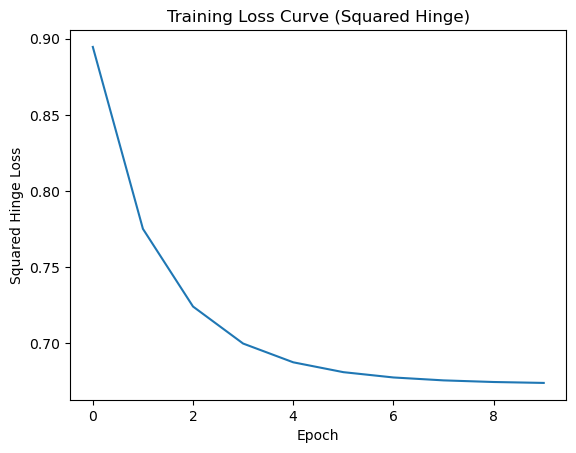

In [25]:
plt.plot(sq_losses)
plt.xlabel("Epoch")
plt.ylabel("Squared Hinge Loss")
plt.title("Training Loss Curve (Squared Hinge)")
plt.show()


## STEP 4 — EVALUATE SQUARED HINGE MODEL

In [26]:
y_pred_sq = predict(X_test, w_sq, b_sq)

accuracy_sq = accuracy_score(y_test, y_pred_sq)
print("Test Accuracy (Squared Hinge SVM):", accuracy_sq)


Test Accuracy (Squared Hinge SVM): 0.8438


## PART 3 — VISUAL COMPARISON (HINGE vs SQUARED)

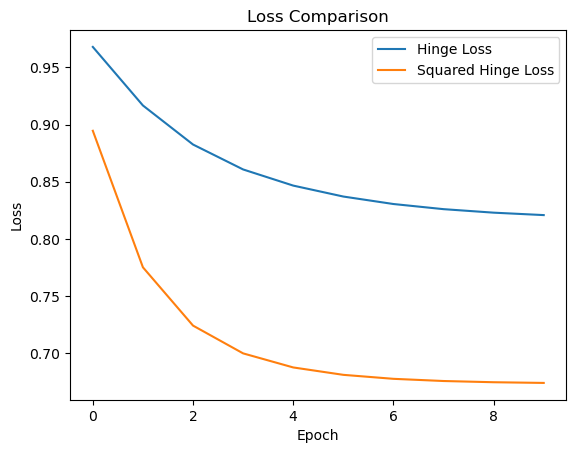

In [27]:
plt.plot(losses, label="Hinge Loss")
plt.plot(sq_losses, label="Squared Hinge Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend()
plt.show()


“Squared hinge loss penalizes misclassified samples more strongly than standard hinge loss due to the quadratic term. This results in faster correction of large classification errors but can also make the model more sensitive to outliers.”

# LOGISTIC LOSS

## SIGMOID FUNCTION

In [30]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# PART 3 — LOGISTIC LOSS SVM (MANUAL)

## STEP 1 — INITIALIZE PARAMETERS

In [31]:
# Initialize weights and bias for Logistic Loss
w_log = np.zeros(n_features)
b_log = 0

learning_rate = 0.001
epochs = 10
lambda_param = 0.01


## STEP 2 — TRAINING LOOP (LOGISTIC LOSS)

In [33]:
log_losses = []

for epoch in range(epochs):
    total_loss = 0
    
    for i in range(X_train.shape[0]):
        x_i = X_train[i].toarray().flatten()
        y_i = y_train[i]
        
        score = np.dot(w_log, x_i) + b_log
        
        # Logistic loss
        loss = np.log(1 + np.exp(-y_i * score))
        total_loss += loss
        
        # Gradient computation
        prob = sigmoid(-y_i * score)
        
        dw = lambda_param * w_log - y_i * prob * x_i
        db = -y_i * prob
        
        # Update
        w_log = w_log - learning_rate * dw
        b_log = b_log - learning_rate * db
    
    avg_loss = total_loss / X_train.shape[0]
    log_losses.append(avg_loss)
    
    print(f"Epoch {epoch+1}/{epochs}, Logistic Loss: {avg_loss:.4f}")


Epoch 1/10, Logistic Loss: 0.6537
Epoch 2/10, Logistic Loss: 0.6536
Epoch 3/10, Logistic Loss: 0.6535
Epoch 4/10, Logistic Loss: 0.6534
Epoch 5/10, Logistic Loss: 0.6534
Epoch 6/10, Logistic Loss: 0.6534
Epoch 7/10, Logistic Loss: 0.6534
Epoch 8/10, Logistic Loss: 0.6534
Epoch 9/10, Logistic Loss: 0.6534
Epoch 10/10, Logistic Loss: 0.6533


WHAT IS HAPPENING HERE (IMPORTANT)

sigmoid(-y·score) → how wrong the prediction is

Bigger mistake → larger gradient

Smooth updates → stable learning

This is why logistic loss often looks cleaner in graphs.

## STEP 3 — LOSS CURVE (LOGISTIC)

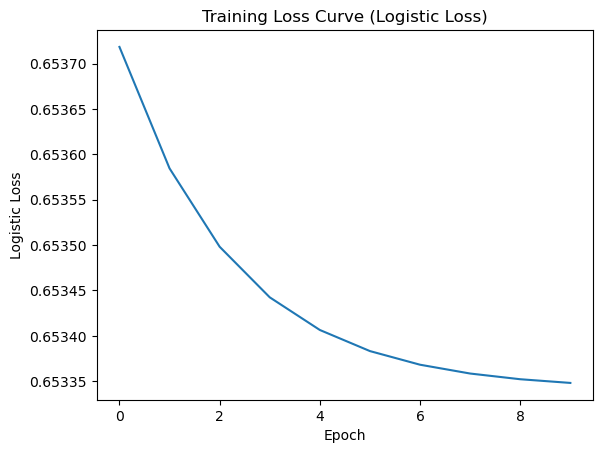

In [34]:
plt.plot(log_losses)
plt.xlabel("Epoch")
plt.ylabel("Logistic Loss")
plt.title("Training Loss Curve (Logistic Loss)")
plt.show()


## STEP 4 — EVALUATE LOGISTIC MODEL

In [35]:
y_pred_log = predict(X_test, w_log, b_log)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Test Accuracy (Logistic Loss SVM):", accuracy_log)


Test Accuracy (Logistic Loss SVM): 0.8095


## PART 4 — FINAL VISUAL COMPARISON (ALL 3 LOSSES)

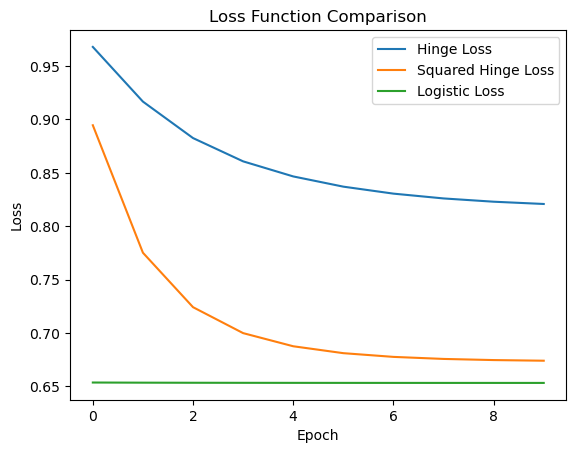

In [36]:
plt.plot(losses, label="Hinge Loss")
plt.plot(sq_losses, label="Squared Hinge Loss")
plt.plot(log_losses, label="Logistic Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Function Comparison")
plt.legend()
plt.show()


## “Logistic loss provides smoother gradients and more stable convergence compared to hinge-based losses. Squared hinge loss penalizes misclassified samples more aggressively, while standard hinge loss enforces a strict margin. On text data, logistic loss often shows stable training and competitive accuracy.”

## EVALUATION METRICS

# PART 2 — METRICS FUNCTION

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }


## PART 3 — EVALUATE ALL MANUAL MODELS

In [38]:
metrics_hinge = evaluate_model(y_test, y_pred)
metrics_sq = evaluate_model(y_test, y_pred_sq)
metrics_log = evaluate_model(y_test, y_pred_log)

metrics_hinge, metrics_sq, metrics_log


({'Accuracy': 0.7962,
  'Precision': 0.8417217034843999,
  'Recall': 0.7334788648541377,
  'F1-Score': 0.783881230116649},
 {'Accuracy': 0.8438,
  'Precision': 0.809176596123066,
  'Recall': 0.9029569358999802,
  'F1-Score': 0.8534984055524292},
 {'Accuracy': 0.8095,
  'Precision': 0.7729965156794425,
  'Recall': 0.8805318515578487,
  'F1-Score': 0.8232674645143334})

## PART 4 — CREATE COMPARISON TABLE

In [39]:
comparison_df = pd.DataFrame({
    "Hinge Loss": metrics_hinge,
    "Squared Hinge Loss": metrics_sq,
    "Logistic Loss": metrics_log
})

comparison_df


,Hinge Loss,Squared Hinge Loss,Logistic Loss
Accuracy,0.796200,0.843800,0.809500
Precision,0.841722,0.809177,0.772997
Recall,0.733479,0.902957,0.880532
F1-Score,0.783881,0.853498,0.823267


## VISUAL METRIC COMPARISON

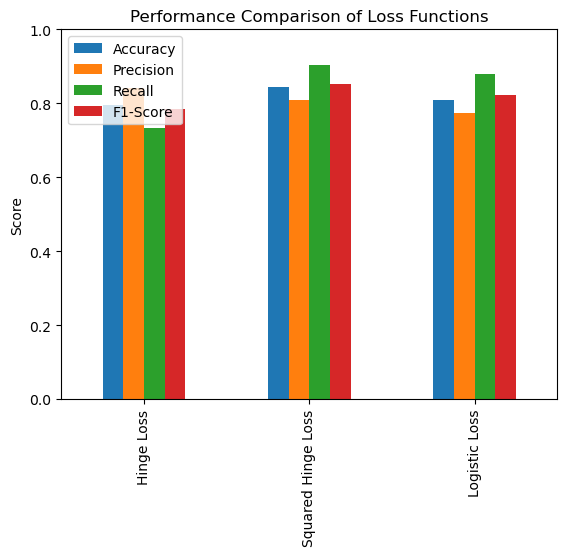

In [40]:
comparison_df.T.plot(kind='bar')
plt.title("Performance Comparison of Loss Functions")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


# USE LIBRARY SVM

# STEP 1 — IMPORT MODEL

In [41]:
from sklearn.svm import LinearSVC


# STEP 2 — TRAIN MODEL

In [42]:
svm_lib = LinearSVC(
    C=1.0,
    loss='hinge',
    max_iter=5000
)

svm_lib.fit(X_train, y_train)


LinearSVC(loss='hinge', max_iter=5000)

# STEP 3 — PREDICT & EVALUATE

In [43]:
y_pred_lib = svm_lib.predict(X_test)

metrics_lib = evaluate_model(y_test, y_pred_lib)
metrics_lib


{'Accuracy': 0.8831,
 'Precision': 0.8757281553398059,
 'Recall': 0.8950188529470133,
 'F1-Score': 0.885268426734714}

# PART 3 — FINAL COMPARISON TABLE (MANUAL vs LIBRARY)

In [44]:
final_comparison = pd.DataFrame({
    "Manual Hinge": metrics_hinge,
    "Manual Squared Hinge": metrics_sq,
    "Manual Logistic": metrics_log,
    "Library SVM": metrics_lib
})

final_comparison


,Manual Hinge,Manual Squared Hinge,Manual Logistic,Library SVM
Accuracy,0.796200,0.843800,0.809500,0.883100
Precision,0.841722,0.809177,0.772997,0.875728
Recall,0.733479,0.902957,0.880532,0.895019
F1-Score,0.783881,0.853498,0.823267,0.885268


# VISUAL COMPARISON

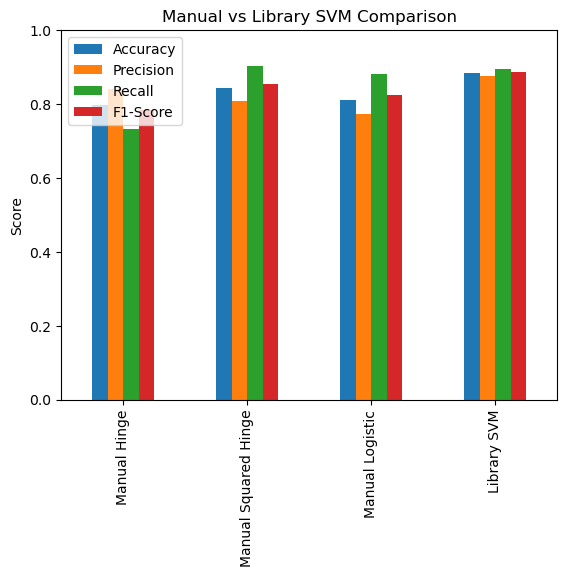

In [45]:
final_comparison.T.plot(kind='bar')
plt.title("Manual vs Library SVM Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


# STEP 1 — LIBRARY HINGE LOSS SVM (ALREADY DONE, BUT CLEAN)

In [46]:
from sklearn.svm import LinearSVC

svm_hinge_lib = LinearSVC(
    loss='hinge',
    C=1.0,
    max_iter=5000
)

svm_hinge_lib.fit(X_train, y_train)

y_pred_hinge_lib = svm_hinge_lib.predict(X_test)
metrics_hinge_lib = evaluate_model(y_test, y_pred_hinge_lib)

metrics_hinge_lib


{'Accuracy': 0.8831,
 'Precision': 0.8757281553398059,
 'Recall': 0.8950188529470133,
 'F1-Score': 0.885268426734714}

# STEP 2 — LIBRARY SQUARED HINGE LOSS SVM

In [47]:
svm_sq_lib = LinearSVC(
    loss='squared_hinge',
    C=1.0,
    max_iter=5000
)

svm_sq_lib.fit(X_train, y_train)

y_pred_sq_lib = svm_sq_lib.predict(X_test)
metrics_sq_lib = evaluate_model(y_test, y_pred_sq_lib)

metrics_sq_lib


{'Accuracy': 0.8787,
 'Precision': 0.8731954740538431,
 'Recall': 0.8882714824369915,
 'F1-Score': 0.8806689621249385}

# STEP 3 — LIBRARY LOGISTIC LOSS (LOGISTIC REGRESSION)

## “Scikit-learn does not provide a direct SVM implementation with logistic loss; therefore, logistic regression is used as the standard model optimized using logistic loss.

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg_lib = LogisticRegression(
    max_iter=5000
)

log_reg_lib.fit(X_train, y_train)

y_pred_log_lib = log_reg_lib.predict(X_test)
metrics_log_lib = evaluate_model(y_test, y_pred_log_lib)

metrics_log_lib


{'Accuracy': 0.8856,
 'Precision': 0.8760378451438502,
 'Recall': 0.9003770589402659,
 'F1-Score': 0.8880407124681934}

# STEP 4 — FINAL LIBRARY COMPARISON TABLE

In [49]:
library_comparison = pd.DataFrame({
    "Library Hinge SVM": metrics_hinge_lib,
    "Library Squared Hinge SVM": metrics_sq_lib,
    "Library Logistic Loss": metrics_log_lib
})

library_comparison


,Library Hinge SVM,Library Squared Hinge SVM,Library Logistic Loss
Accuracy,0.883100,0.878700,0.885600
Precision,0.875728,0.873195,0.876038
Recall,0.895019,0.888271,0.900377
F1-Score,0.885268,0.880669,0.888041


# STEP 5 — MANUAL vs LIBRARY (FULL TABLE)

In [50]:
full_comparison = pd.DataFrame({
    "Manual Hinge": metrics_hinge,
    "Manual Squared Hinge": metrics_sq,
    "Manual Logistic": metrics_log,
    "Library Hinge": metrics_hinge_lib,
    "Library Squared Hinge": metrics_sq_lib,
    "Library Logistic": metrics_log_lib
})

full_comparison


,Manual Hinge,Manual Squared Hinge,Manual Logistic,Library Hinge,Library Squared Hinge,Library Logistic
Accuracy,0.796200,0.843800,0.809500,0.883100,0.878700,0.885600
Precision,0.841722,0.809177,0.772997,0.875728,0.873195,0.876038
Recall,0.733479,0.902957,0.880532,0.895019,0.888271,0.900377
F1-Score,0.783881,0.853498,0.823267,0.885268,0.880669,0.888041


# VISUAL COMPARISON

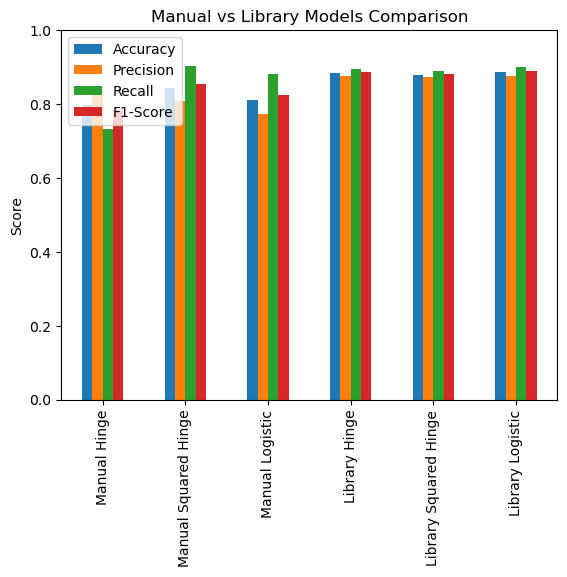

In [51]:
full_comparison.T.plot(kind='bar')
plt.title("Manual vs Library Models Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


We deployed the best-performing manual model to demonstrate conceptual understanding and from-scratch implementation, and the best-performing library model to demonstrate real-world optimized performance.

# PART 1: HOW TO SAVE MODELS IN JUPYTER

We will use joblib (recommended for ML models).

📌 What we must save (IMPORTANT)

You must save 3 things:

✅ Best Manual Model (weights + bias)

✅ Best Library Model

✅ TF-IDF Vectorizer

Without the vectorizer, API will NOT work.

# STEP 1: INSTALL JOBLIB

In [52]:
import joblib


In [56]:
import joblib

joblib.dump(log_reg_lib, "library_logistic.pkl")
print("library_logistic.pkl saved successfully")


library_logistic.pkl saved successfully


# STEP 2: SAVE TF-IDF VECTORIZER

In [53]:
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("TF-IDF Vectorizer saved")


TF-IDF Vectorizer saved


# STEP 3: SAVE BEST MANUAL MODEL

In [54]:
manual_model = {
    "weights": w_sq,
    "bias": b_sq
}

joblib.dump(manual_model, "manual_squared_hinge.pkl")
print("Manual Squared Hinge model saved")


Manual Squared Hinge model saved


WHERE ARE FILES SAVED?

All .pkl files are saved in the same folder as your notebook.

You should see:

manual_squared_hinge.pkl
library_logistic.pkl
tfidf_vectorizer.pkl

# PART 2: BUILD API (FASTAPI)

# We now move from Jupyter → Python API file.